<a href="https://colab.research.google.com/github/k4404c/MAT-422/blob/main/HW2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **2.4 Maximum Likelihood Estimation**
Important Topics:
* MLE for Random Samples
* Linear Regression


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd

#### **MLE for Random Samples**:
* Maximum likelihood estimation (MLE) is an effective approach of estimating
the parameters of a probability distribution through maximizing a likelihood
function.
* "Maximum likelihood estimate" is the point in the parameter space which maximizes the likelihood function.


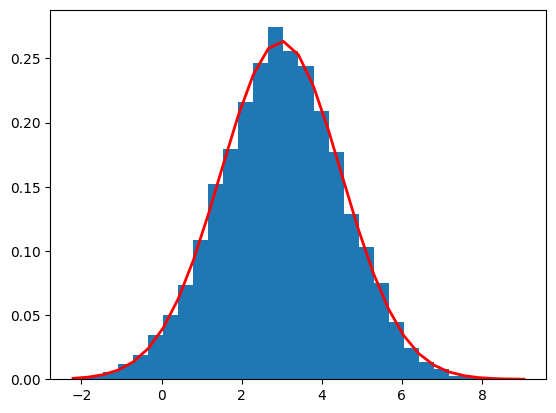

In [ ]:
x = np.random.normal(loc= 3, scale = 1.5, size=10000)
count, bins, ignored = plt.hist(x, 30, density=True)

def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

def MLE_Normal_mew(data):
  mew = np.mean(data)
  return mew
def MLE_Normal_sigma(data):
  sigma = np.std(data)
  return sigma

mu = MLE_Normal_mew(x)
sigma = MLE_Normal_sigma(x)

xi = np.linspace(0, 1, 1000)


plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='r') #Approximated function using MLE mu and sigma

plt.show()

#the function models the random data generated.

#### **Linear Regression**:
* Same process as Least-Squares discussed in 1.3


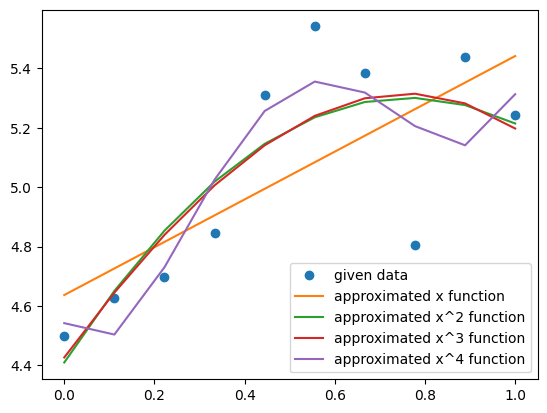

In [20]:
def f1(c,x):
  return c[0] + c[1]*x
def f2(c,x):
  return c[0] + c[1]*x + c[2]*x**2
def f3(c,x):
  return c[0] + c[1]*x + c[2]*x**2 + c[3]*x**3
def f4(c,x):
  return c[0] + c[1]*x + c[2]*x**2 + c[3]*x**3 + c[4]*x**4



xi = np.linspace(0, 1, 10)
yi = 4.5 + xi + xi * np.random.random(len(xi)) - np.multiply(xi,xi) *np.random.random(len(xi)) - np.multiply(np.multiply(xi, xi),xi) * np.random.random(len(xi)) + np.multiply(np.multiply(xi, xi),np.multiply(xi, xi)) * np.random.random(len(xi))

X1 = np.stack((np.ones(len(xi)), xi), axis = -1)
X2 = np.stack((np.ones(len(xi)), xi,xi**2), axis = -1)
X3 = np.stack((np.ones(len(xi)), xi,xi**2, xi**3), axis = -1)
X4 = np.stack((np.ones(len(xi)), xi,xi**2, xi**3, xi**4), axis = -1)

Q1,R1 = np.linalg.qr(X1)
Q2,R2 = np.linalg.qr(X2)
Q3,R3 = np.linalg.qr(X3)
Q4,R4 = np.linalg.qr(X4)

c1 = np.dot(np.dot(np.linalg.inv(R1), Q1.transpose()),yi)
ylist1 = f1(c1,xi)

c2 = np.dot(np.dot(np.linalg.inv(R2), Q2.transpose()),yi)
ylist2 = f2(c2,xi)

c3 = np.dot(np.dot(np.linalg.inv(R3), Q3.transpose()),yi)
ylist3 = f3(c3,xi)

c4 = np.dot(np.dot(np.linalg.inv(R4), Q4.transpose()),yi)
ylist4 = f4(c4,xi)

plt.plot(xi, yi, 'o', label = "given data")
plt.plot(xi,ylist1, label = "approximated x function")
plt.plot(xi,ylist2, label = "approximated x^2 function")
plt.plot(xi,ylist3, label = "approximated x^3 function")
plt.plot(xi,ylist4, label = "approximated x^4 function")
plt.legend()
plt.show()